# Runge-Kutta methods

In [ ]:
using Plots
gr()

We will implement in Julia different numerical methods to solve

$$
y'(t) = 1 - y(t)
$$

$ t \in [0,5] \qquad \mbox{ and } \qquad y(0) = 0 $

## Explicit Euler

In [ ]:
"""

   euler(f::Function, t::Float64, y::Float64, dt::Float64)

explicit euler method function that returns

\begin{equation}
y^{n+1} = y^n + dt \\cdot f(t^n, y^n)
\end{equation}

*Example*

```julia-repl
julia> f(t, y) =  1 - y
julia> euler(f, 0.0, 0.0, 1.0)
1.0, 1.0
```

"""
function euler(f::Function, t::Float64, y::Float64, dt::Float64)
    t + dt, y + dt * f(t,y)
end

In [ ]:
?euler

## Runge-Kutta 2nd order

In [ ]:
"""

   rk2(f::Function, t::Float64, y::Float64,  dt::Float64)

Runge-Kutta second order method function

# Examples
```jldoctest
julia> f(t,y) = 1 - y
julia> rk2(f, 0.0, 0.0, 1.0)
(1.0, 0.5)
```

"""
function rk2(f::Function, t::Float64, y::Float64,  dt::Float64)
    ỹ = y + f(t,y)*dt/2
    t + dt, y + f(t+dt/2,ỹ)*dt
end

In [ ]:
?rk2

In [ ]:
f(t,y) = 1 - y
rk2(f, 0.0, 0.0, 1.0)

In [ ]:
?rk2

## Runge-Kutta 4th order

In [ ]:
"""

   rk4(f::Function, t::Float64, y::Float64,  dt::Float64)

Runge-Kutta fourth order method function

[Runge–Kutta methods on Wikipedia](https://en.wikipedia.org/wiki/Runge–Kutta_methods)

"""
function rk4(f::Function, t::Float64, y::Float64,  dt::Float64)

    y₁ = dt * f(t,y)
    y₂ = dt * f(t+dt/2,y+y₁/2)
    y₃ = dt * f(t+dt/2,y+y₂/2)
    y₄ = dt * f(t+dt,y+y₃)

    t+dt, y+(y₁+2*y₂+2*y₃+y₄)/6

end

In [ ]:
?rk4

## Solver function

In [ ]:
"""

    solver(f::Function, Method::Function, t₀::Float64,
                y₀::Float64, dt::Float64, nsteps::Int64)

Solve numerically the equation ``y' = f(t, y)``

with `y(t₀)= y₀` and `nsteps` time step `dt`

# Arguments
- `f::Function`: the function `f` of equation ``y' = f(t,y)``.
- `Method::Function`: numerical method from (tⁿ,yⁿ) returns ``(t^{n+1},y^{n+1})``


"""
function solver(f::Function,
                Method::Function,
                t₀::Float64,
                y₀::Float64, dt::Float64, nsteps::Int64)

    t = zeros(Float64,nsteps)
    y = similar(t)

    t[1] = t₀
    y[1] = y₀

    for i in 2:nsteps
       t[i], y[i] = Method(f,t[i-1],y[i-1], dt)
    end

    t, y

end

In [ ]:
?solver

In [ ]:
f(t, y) = 1 - y
solver(f, euler, 0.0,0.0, 1.0, 1)

In [ ]:
nsteps  = 7
tfinal  = 5.0
t₀ = 0.
x₀ = 0.0

dt = tfinal / nsteps
f(t, x) = 1 - x

In [ ]:
plot(solver(f, euler, t₀, x₀, dt, nsteps), marker = :o, label=:euler)
plot!(solver(f, rk2, t₀, x₀, dt, nsteps), marker= :o,   label=:rk2)
plot!(solver(f, rk4, t₀, x₀, dt, nsteps), marker = :o,  label=:rk4)
t = t₀:dt:tfinal
plot!(t, 1 .- exp.(-t),label = :exact)

Creating expressions via interpolation

We want to create a solver function with the method choosen at initialization.

In [ ]:
macro make_method( meth)
    return quote
        function (f::Function, t₀::Float64,
                  x₀::Float64, dt::Float64, nsteps::Int64)

            t = zeros(Float64,nsteps)
            x = zeros(Float64,nsteps)

            t[1] = t₀
            x[1] = x₀

            for i in 2:nsteps
               t[i], x[i] = $meth(f,t[i-1],x[i-1], dt)
            end

            return t, x
        end
    end
end

In [ ]:
rk4_solver = @make_method rk4

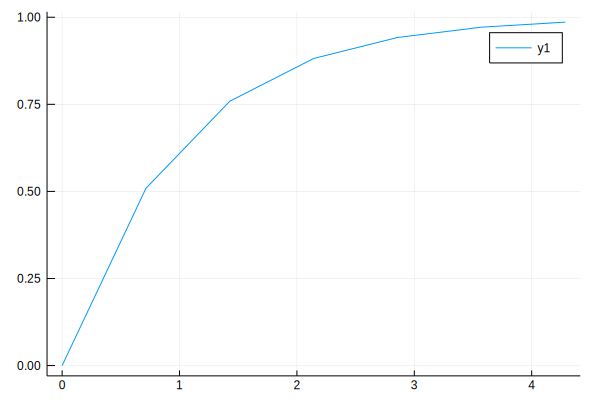

In [35]:
plot(rk4_solver(f, t₀, x₀, dt, nsteps))

La méthode de Runge-Kutta d'ordre ''q'' sera donc donnée par :
$$
\forall i = 1, \dotsc, q, \begin{cases}t_{n,i} &= t_n + c_i h_n, \\ 
y_{n,i} &= y_n + h_n \sum_{k = 1}^{i-1} a_{ik} p_{n,k}\\ 
p_{n,i} &= f(t_{n,i}, y_{n,i}) \end{cases}
$$

$$
y_{n+1} = y_n + h_n \sum_{k = 1}^q b_k p_{n,k}.
$$


## Butcher Tableau

~~~
c_1
c_2  a_{21}
c_3  a_{31} a_{32} 
c_4  a_{41} a_{42} a_{43} a_{44}
     b_1    b_2    b_3    b_4
~~~

In [36]:
struct RungeKutta
    
    a = Array{Float64, 2}
    b = Array{Float64, 1}
    c = Array{Float64, 1}
    k = Array{Float64, 1}
    
    function RungeKutta( a, b, c)
        
        q = length(a)
        k = zeros(Float64, q)
        
        new( a, b, c, k)
    end
    
end
    
function (rk::RungeKutta)(f::Function, t::Float64, y::Float64,  dt::Float64)

    for i = 1:q
        
    end
    y₁ = α₁ * dt * f(t,y)
    y₂ = α₂ * dt * f(t+dt/2,y+y₁/2)
    y₃ = α₃ * dt * f(t+dt/2,y+y₂/2)
    y₄ = α₄ * dt * f(t+dt,y+y₃)

    t+dt, y+(y₁+2*y₂+2*y₃+y₄)/6

end

ErrorException: syntax: "a = Array{Float64, 2}" inside type definition is reserved

In [38]:
a = [ 0 0 0 0; 1/2 0 0 0; 0 1/2 0 0; 0 0 1 0]
b = [0 1/2 1/2 1]
c = [1/6 1/3 1/3 1/6]

4×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.5  0.0  0.0  0.0
 0.0  0.5  0.0  0.0
 0.0  0.0  1.0  0.0

In [39]:
a[2,1]

0.5

In [40]:
a[4,3]

1.0

In [41]:
a = [ 0 0 0 0; 1/3 0 0 0; -1/3 1 0 0; 1 -1 1 0]
b = [1/8 3/8 3/8 1/8]
c = [0 1/3 2/3 1]

1×4 Array{Float64,2}:
 0.0  0.333333  0.666667  1.0

[Reference](https://www.juliabloggers.com/runge-kutta-methods/):Ordinary Differential Equation Solvers: Runge-Kutta Methods by Christina Lee

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*